<a href="https://colab.research.google.com/github/fedhere/FDSfE_FBianco/blob/main/classdemo/12_1_2022_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pylab as plt

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
mnist = load_digits()

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
mnist.data.shape

(1797, 64)

In [ ]:
mnist.images.shape

(1797, 8, 8)

In [ ]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

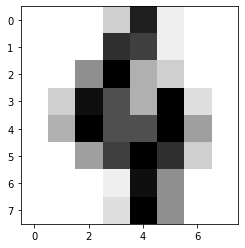

In [ ]:
plt.imshow(mnist.images[97], cmap="binary");

In [ ]:
mnist.target.shape

(1797,)

In [ ]:
X = mnist.data
y = mnist.target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    random_state=321, stratify=y)

In [ ]:
X_train.shape

(1257, 64)

In [ ]:
y_train.shape

(1257,)

In [ ]:
X_test.shape

(540, 64)

In [ ]:
y_test.shape

(540,)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(activation="relu", hidden_layer_sizes=(40,40),
                    random_state=4, verbose=1, max_iter=400)

In [ ]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 13.37129463
Iteration 2, loss = 7.35670227
Iteration 3, loss = 5.14135243
Iteration 4, loss = 3.39778902
Iteration 5, loss = 2.48521928
Iteration 6, loss = 1.98502229
Iteration 7, loss = 1.59521458
Iteration 8, loss = 1.28612080
Iteration 9, loss = 1.05561440
Iteration 10, loss = 0.90079981
Iteration 11, loss = 0.76859662
Iteration 12, loss = 0.66068034
Iteration 13, loss = 0.56767775
Iteration 14, loss = 0.49511492
Iteration 15, loss = 0.43790064
Iteration 16, loss = 0.38680166
Iteration 17, loss = 0.34539347
Iteration 18, loss = 0.30939637
Iteration 19, loss = 0.28136096
Iteration 20, loss = 0.25256167
Iteration 21, loss = 0.22911425
Iteration 22, loss = 0.20985363
Iteration 23, loss = 0.19270634
Iteration 24, loss = 0.17705582
Iteration 25, loss = 0.16418303
Iteration 26, loss = 0.15157124
Iteration 27, loss = 0.14161005
Iteration 28, loss = 0.13287921
Iteration 29, loss = 0.12463326
Iteration 30, loss = 0.11752481
Iteration 31, loss = 0.10994645
Iteration 32, lo

MLPClassifier(hidden_layer_sizes=(40, 40), max_iter=400, random_state=4,
              verbose=1)

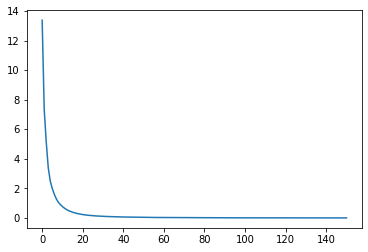

In [ ]:
plt.plot(mlp.loss_curve_)

In [ ]:
mlp.score(X_train, y_train)

1.0

In [ ]:
mlp.score(X_test, y_test)

0.9648148148148148

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = mlp.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        53
           3       0.96      0.98      0.97        55
           4       0.96      0.98      0.97        54
           5       0.89      0.98      0.93        55
           6       0.98      0.98      0.98        54
           7       0.98      0.98      0.98        54
           8       0.96      0.87      0.91        52
           9       0.96      0.89      0.92        54

    accuracy                           0.96       540
   macro avg       0.97      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[53,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 53,  0,  0],
       [ 0,  1,  0,  2,  2,  1,  0,  0, 45,  1],
       [ 0,  1,  0,  0,  0,  3,  0,  1,  1, 48]])